# Retention Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit

In [12]:
all_data = pd.read_csv('demo_test_data.csv')

1) Weighted retention curve for last 180 days

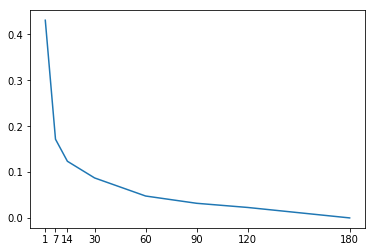

In [15]:
data_last180days = all_data.iloc[819:999,:12]    #excluded last day as it has no retention rate yet

weighted_lst = []

for i in range(8):
  i += 4
  weighted = (data_last180days.iloc[:,i] * data_last180days["DNU"]).sum(skipna = True) / data_last180days["DNU"].sum(skipna = True)
  # need to exclude DNU values from denimonator when the Dx value is Null
  weighted_lst.append(weighted)

cols = all_data.iloc[1:2,4:12].columns

col_lst = []

for i in cols:
    col_num = i.replace('D','')
    col_lst.append(int(col_num))


avg_df = pd.DataFrame({'Dx': col_lst , 'Weighted': weighted_lst})
avg_df.set_index('Dx', inplace=True)

tickvalues = avg_df.index
plt.xticks(ticks = tickvalues)
plt.plot(avg_df)
plt.show()

2) Fit power curve to weighted retention curve

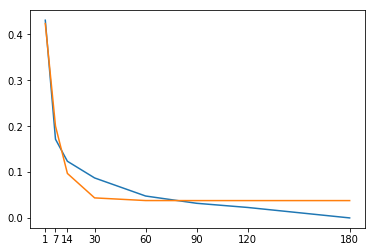

In [16]:
x = avg_df.index
y = avg_df['Weighted']
popt, pcov = scipy.optimize.curve_fit(lambda t,a,b,c: a*np.exp(-b*t) + c,  x,  y)

a = popt[0]
b = popt[1]
c = popt[2]

plt.xticks(ticks = tickvalues)
plt.plot(avg_df)
plt.plot(x, a * np.exp(-b * x) + c)
plt.show()

3) Plot modelled daily active users against actual data

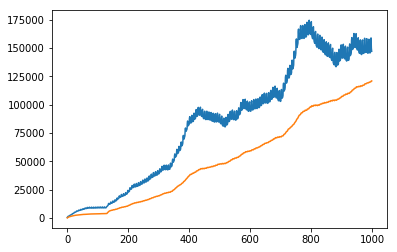

In [17]:
lst_predicted = []
lst_predicted1 = []

for i in range(len(all_data)):
  tot_new_users = all_data.iloc[i , 1]
  for ii in range(1, 999, 1):         
    func = a * np.exp(-b * int(ii)) + c
    val = func * tot_new_users
    lst_predicted1.append(val)
  lst_predicted.append(lst_predicted1)
  lst_predicted1 = []

df_predicted = pd.DataFrame(lst_predicted)

prediction = []

for i in range(len(df_predicted)):
  df = df_predicted.iloc[0:i , 0:i]
  df = np.flipud(df)
  day = np.asarray(df)
  daysum = np.trace(day)
  prediction.append(daysum)

plt.plot(all_data["DAU"])
plt.plot(prediction)
plt.show()

Observation

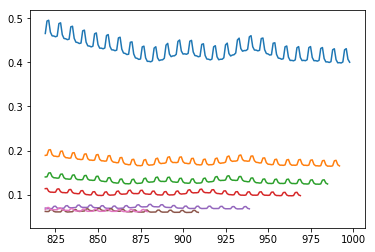

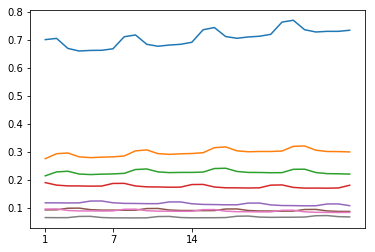

In [18]:
#Retention rate increases over weekends
retention_weekends = all_data.iloc[819:,4:12]

plt.plot(retention_weekends)
plt.show()

retention_weekends1 = all_data.iloc[1:29,4:12]

plt.xticks(ticks = tickvalues)
plt.plot(retention_weekends1)
plt.show()